In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
%matplotlib inline
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus=False)

In [229]:
df_titanic=pd.read_csv("/home/piai/다운로드/bigdata/titanic.csv")
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [106]:
#기술통계량 확인
df_titanic.describe(include='all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   891.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.758889    0.523008    0.381594     NaN   32.204208      NaN   
std      13.002570    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      22.000000    0.000000    0.000000     NaN    7.910400      NaN   
50%      30.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      35.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

#### 데이터 타입이 숫자인 경우의 요약정보를 확인
#### 평균, 표준편차, 최소값, 사분위수, 최대값

In [27]:
#데이터 속성 확인
df_titanic.shape

(891, 12)

#### 데이터 수 891개, 속성 12개

In [22]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
#결측치 확인
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabin(객실 번호)의 결측값이 687개, Embarked의 결측값이 2개

In [250]:
df_df=df_titanic[(df_titanic["Cabin"].isnull())]

In [251]:
df_df.describe(include='all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    687.000000  687.000000  687.000000                      687   687   
unique          NaN         NaN         NaN                      687     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   470   
mean     443.208151    0.299854    2.639010                      NaN   NaN   
std      259.215905    0.458528    0.589602                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      214.500000    0.000000    2.000000                      NaN   NaN   
50%      441.000000    0.000000    3.000000                      NaN   NaN   
75%      664.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch Ticket        Fare Cabin Embarked  
count   687.000000  687.000000  687.000000    687  687.000000     0      687  
unique         NaN         NaN         NaN    549         NaN     0        3  
top            NaN         NaN         NaN   1601         NaN   NaN        S  
freq           NaN         NaN         NaN      7         NaN   NaN      515  
mean     28.117540    0.547307    0.365357    NaN   19.157325   NaN      NaN  
std      11.864479    1.207492    0.827106    NaN   28.663343   NaN      NaN  
min       0.420000    0.000000    0.000000    NaN    0.000000   NaN      NaN  
25%      21.500000    0.000000    0.000000    NaN    7.877100   NaN      NaN  
50%      30.000000    0.000000    0.000000    NaN   10.500000   NaN      NaN  
75%      32.000000    1.000000    0.000000    NaN   23.000000   NaN      NaN  
max      74.000000    8.000000    6.000000    NaN  512.329200   NaN      NaN

In [49]:
#이상치 확인

## 설명변수 중 연속형 변수인 Age, Fare의 분포를 boxplot, 히스토그램으로 확인

<AxesSubplot:>

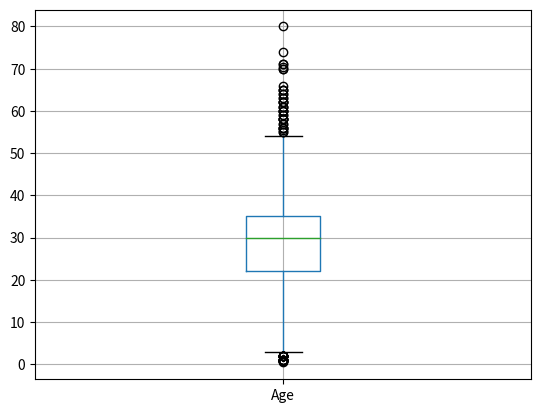

In [231]:
df_titanic.boxplot(column="Age")

<AxesSubplot:>

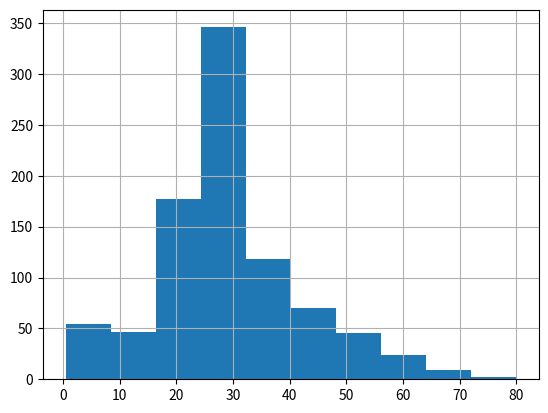

In [232]:
df_titanic["Age"].hist()

#### 탑승객은 20-30대가 가장 많음
#### Q3(35)-Q1(22)=IQR=13
#### Q1-1.5IQR(2.5)보다 작거나 Q3+1.5IQR(54.5)보다 큰 수는 이상치

In [51]:
#이상치 확인
df_titanic[(df_titanic["Age"]>54.5)]

PassengerId  Survived  Pclass  \
11            12         1       1   
15            16         1       2   
33            34         0       2   
54            55         0       1   
94            95         0       3   
96            97         0       1   
116          117         0       3   
152          153         0       3   
170          171         0       1   
174          175         0       1   
195          196         1       1   
232          233         0       2   
252          253         0       1   
268          269         1       1   
275          276         1       1   
280          281         0       3   
326          327         0       3   
366          367         1       1   
438          439         0       1   
456          457         0       1   
467          468         0       1   
483          484         1       3   
487          488         0       1   
492          493         0       1   
493          494         0       1   
545          546         0       1   
555          556         0       1   
570          571         1       2   
587          588         1       1   
625          626         0       1   
626          627         0       2   
630          631         1       1   
647          648         1       1   
659          660         0       1   
672          673         0       2   
684          685         0       2   
694          695         0       1   
745          746         0       1   
772          773         0       2   
829          830         1       1   
851          852         0       3   
879          880         1       1   

                                                 Name     Sex   Age  SibSp  \
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
33                              Wheadon, Mr. Edward H    male  66.0      0   
54                     Ostby, Mr. Engelhart Cornelius    male  65.0      0   
94                                  Coxon, Mr. Daniel    male  59.0      0   
96                          Goldschmidt, Mr. George B    male  71.0      0   
116                              Connors, Mr. Patrick    male  70.5      0   
152                                  Meo, Mr. Alfonzo    male  55.5      0   
170                         Van der hoef, Mr. Wyckoff    male  61.0      0   
174                           Smith, Mr. James Clinch    male  56.0      0   
195                              Lurette, Miss. Elise  female  58.0      0   
232                         Sjostedt, Mr. Ernst Adolf    male  59.0      0   
252                         Stead, Mr. William Thomas    male  62.0      0   
268     Graham, Mrs. William Thompson (Edith Junkins)  female  58.0      0   
275                 Andrews, Miss. Kornelia Theodosia  female  63.0      1   
280                                  Duane, Mr. Frank    male  65.0      0   
326                         Nysveen, Mr. Johan Hansen    male  61.0      0   
366  Warren, Mrs. Frank Manley (Anna Sophia Atkinson)  female  60.0      1   
438                                 Fortune, Mr. Mark    male  64.0      1   
456                         Millet, Mr. Francis Davis    male  65.0      0   
467                        Smart, Mr. John Montgomery    male  56.0      0   
483                            Turkula, Mrs. (Hedwig)  female  63.0      0   
487                           Kent, Mr. Edward Austin    male  58.0      0   
492                        Molson, Mr. Harry Markland    male  55.0      0   
493                           Artagaveytia, Mr. Ramon    male  71.0      0   
545                      Nicholson, Mr. Arthur Ernest    male  64.0      0   
555                                Wright, Mr. George    male  62.0      0   
570                                Harris, Mr. George    male  62.0      0   
587                  Frolicher-Stehli, Mr. Maxmillian    male  60.0      1   
625                           

In [52]:
df_titanic[(df_titanic["Age"]<2.5)]

PassengerId  Survived  Pclass                               Name     Sex  \
7              8         0       3     Palsson, Master. Gosta Leonard    male   
16            17         0       3               Rice, Master. Eugene    male   
78            79         1       2      Caldwell, Master. Alden Gates    male   
119          120         0       3  Andersson, Miss. Ellis Anna Maria  female   
164          165         0       3       Panula, Master. Eino Viljami    male   
172          173         1       3       Johnson, Miss. Eleanor Ileen  female   
183          184         1       2          Becker, Master. Richard F    male   
205          206         0       3         Strom, Miss. Telma Matilda  female   
297          298         0       1       Allison, Miss. Helen Loraine  female   
305          306         1       1     Allison, Master. Hudson Trevor    male   
340          341         1       2     Navratil, Master. Edmond Roger    male   
381          382         1       3        Nakid, Miss. Maria ("Mary")  female   
386          387         0       3    Goodwin, Master. Sidney Leonard    male   
469          470         1       3      Baclini, Miss. Helene Barbara  female   
479          480         1       3           Hirvonen, Miss. Hildur E  female   
530          531         1       2           Quick, Miss. Phyllis May  female   
642          643         0       3      Skoog, Miss. Margit Elizabeth  female   
644          645         1       3             Baclini, Miss. Eugenie  female   
755          756         1       2          Hamalainen, Master. Viljo    male   
788          789         1       3         Dean, Master. Bertram Vere    male   
803          804         1       3    Thomas, Master. Assad Alexander    male   
824          825         0       3       Panula, Master. Urho Abraham    male   
827          828         1       2              Mallet, Master. Andre    male   
831          832         1       2    Richards, Master. George Sibley    male   

      Age  SibSp  Parch           Ticket      Fare    Cabin Embarked  
7    2.00      3      1           349909   21.0750      NaN        S  
16   2.00      4      1           382652   29.1250      NaN        Q  
78   0.83      0      2           248738   29.0000      NaN        S  
119  2.00      4      2           347082   31.2750      NaN        S  
164  1.00      4      1          3101295   39.6875      NaN        S  
172  1.00      1      1           347742   11.1333      NaN        S  
183  1.00      2      1           230136   39.0000       F4        S  
205  2.00      0      1           347054   10.4625       G6        S  
297  2.00      1      2           113781  151.5500  C22 C26        S  
305  0.92      1      2           113781  151.5500  C22 C26        S  
340  2.00      1      1           230080   26.0000       F2        S  
381  1.00      0      2             2653   15.7417      NaN        C  
386  1.00      5      2          CA 2144   46.9000      NaN        S  
469  0.75      2      1             2666   19.2583      NaN        C  
479  2.00      0      1          3101298   12.2875      NaN        S  
530  2.00      1      1            26360   26.0000      NaN        S  
642  2.00      3      2           347088   27.9000      NaN        S  
644  0.75      2      1             2666   19.2583      NaN        C  
755  0.67      1      1           250649   14.5000      NaN        S  
788  1.00      1      2        C.A. 2315   20.5750      NaN        S  
803  0.42      0      1             2625    8.5167      NaN        C  
824  2.00      4      1          3101295   39.6875      NaN        S  
827  1.00      0      2  S.C./PARIS 2079   37.0042      NaN        C  
831  0.83      1      1            29106   18.7500      NaN        S

<AxesSubplot:>

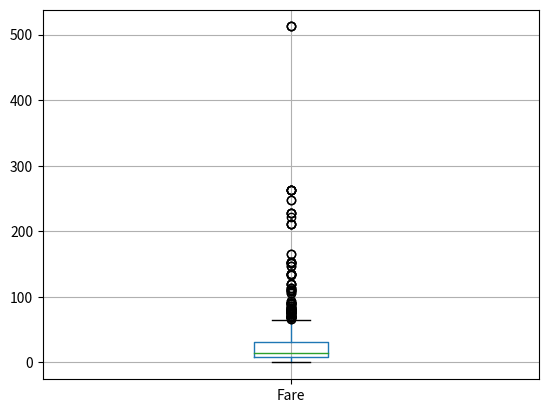

In [50]:
df_titanic.boxplot(column="Fare")

<AxesSubplot:>

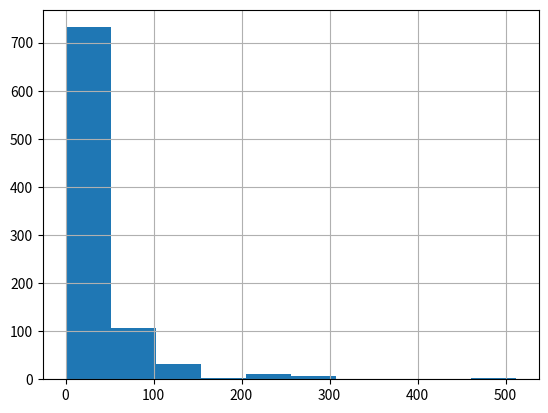

In [233]:
df_titanic["Fare"].hist()

#### 티켓 요금은 50 이하가 가장 많으며 이상치가 다수 발생(요금 구간의 폭이 큼)
#### Q3(31.000000)-Q1(7.910400)=IQR=23.0896
#### Q1-1.5*IQR(-26.724)보다 작거나 Q3+1.5*IQR(65.6344)보다 큰 수는 이상치

In [53]:
#이상치 확인
df_titanic[(df_titanic["Fare"]>65.6344)]

PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  30.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ...    ...   
846                           Sage, Mr. Douglas Bullen    male  30.0      8   
849       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female  30.0      1   
856         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0      1   
863                  Sage, Miss. Dorothy Edith "Dolly"  female  30.0      8   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   

     Parch    Ticket      Fare        Cabin Embarked  
1        0  PC 17599   71.2833          C85        C  
27       2     19950  263.0000  C23 C25 C27        S  
31       0  PC 17569  146.5208          B78        C  
34       0  PC 17604   82.1708          NaN        C  
52       0  PC 17572   76.7292          D33        C  
..     ...       ...       ...          ...      ...  
846      2  CA. 2343   69.5500          NaN        S  
849      0     17453   89.1042          C92        C  
856      1     36928  164.8667          NaN        S  
863      2  CA. 2343   69.5500          NaN        S  
879      1     11767   83.1583          C50        C  

[116 rows x 12 columns]

In [205]:
df_titanic[(df_titanic["Fare"]>500)]

PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex   Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female  35.0      0      0  PC 17755  512.3292          NaN        C  
679    male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male  35.0      0      0  PC 17755  512.3292         B101        C

#### 승객 등급이 1등급, 혹은 함께 탑승한 가족 다수 존재
#### 승객 번호 259, 680, 728의 경우 동승객이 0-1명 임에도 티켓값으로 512달러 이상 지불

## 설명변수 중 범주형 변수인 Pclass, Sex, SibSp, Parch, Embarked의 분포(pie, bar)

Text(0.5, 0, '승객 등급')

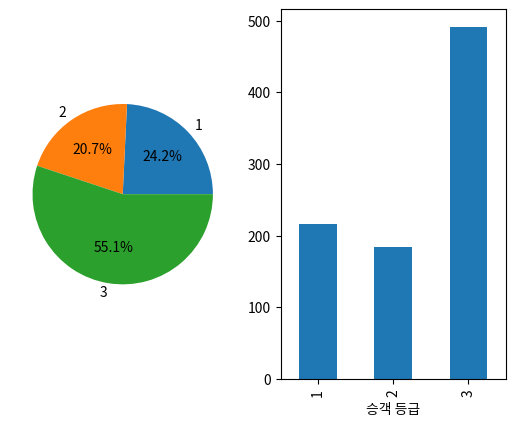

In [188]:
#Pclass
fig0,axe0=plt.subplots(nrows=1,ncols=2)
df_count0=df_titanic["Pclass"].value_counts()
df_count0.sort_index(inplace=True);
axe0[0].pie(df_count0, labels=df_count0.index.tolist(),autopct ='%.1f%%')
df_count0.plot.bar()
plt.xlabel('승객 등급')

### 1등석 승객: 24.2%
### 2등석 승객: 20.7%
### 3등석 승객: 55.1%

Text(0.5, 0, '성별')

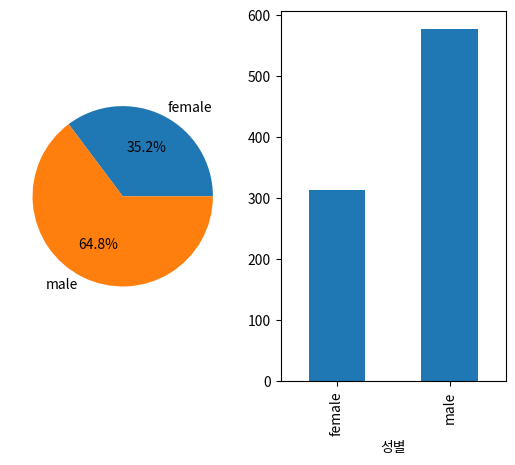

In [185]:
#Sex
fig1,axe1=plt.subplots(nrows=1,ncols=2)
df_count1=df_titanic["Sex"].value_counts()
df_count1.sort_index(inplace=True);
a=df_count1.index.tolist()
axe1[0].pie(df_count1, labels=a, autopct ='%.1f%%')
df_count1.plot.bar()
plt.xlabel('성별')

### 여성 : 35.2%
### 남성 : 64.8%

In [149]:
def function1(x):
    if x>1:
        return 3
    else:
        return x

In [187]:
#SibSp
df_titanic["SibSp"]=df_titanic["SibSp"].apply(function1)
fig2,axe2=plt.subplots(nrows=1,ncols=2)
plt.tight_layout(w_pad=5,h_pad=5)
cnt=['0','1','over 1']
df_count2=df_titanic["SibSp"].value_counts()
df_count2.sort_index(inplace=True);
axe2[0].pie(df_count2, labels=cnt, autopct ='%.1f%%');
axe2[0].set_xlabel("함께 탑승한 형제, 배우자 수",fontsize=12)
axe2[1].bar(cnt,df_count2);

### 함께 탑승한 형제, 배우자 수 0명 : 68.2%
### 함께 탑승한 형제, 배우자 수 1명 : 23.5%
### 함께 탑승한 형제, 배우자 수 1명 초과 : 8.3%

In [200]:
#Parch
df_titanic["Parch"]=df_titanic["Parch"].apply(function1)
fig3,axe3=plt.subplots(nrows=1,ncols=2)
plt.tight_layout(w_pad=5,h_pad=5)
df_count3=df_titanic["Parch"].value_counts()
df_count3.sort_index(inplace=True);ㅠ
axe3[0].pie(df_count3, labels=cnt, autopct ='%.1f%%')
axe3[0].set_xlabel("함께 탑승한 자녀, 부모 수",fontsize=12)
axe3[1].bar(cnt,df_count3);

### 함께 탑승한 자녀, 부모 수 0명 : 76.1%
### 함께 탑승한 자녀, 부모 수 1명 : 13.2%
### 함께 탑승한 자녀, 부모 수 1명 초과 : 10.7%

Text(0.5, 0, '승객이 탑승한 곳')

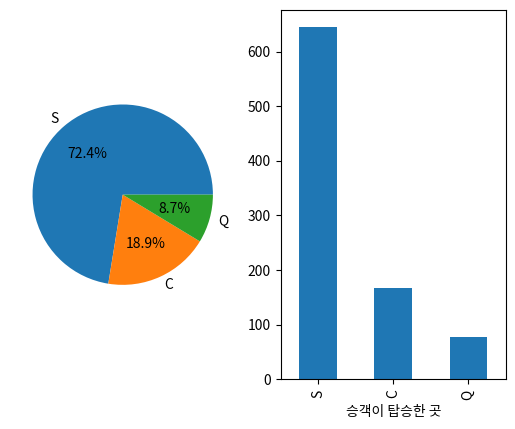

In [197]:
#Embarked
fig4,axe4=plt.subplots(nrows=1,ncols=2)
df_count4=df_titanic["Embarked"].value_counts()
df_count1.sort_index(inplace=True);
a1=df_count4.index.tolist()
axe4[0].pie(df_count4, labels=a1, autopct ='%.1f%%')
df_count4.plot.bar()
plt.xlabel('승객이 탑승한 곳')

### S(southampton)에서 탑승한 승객 : 72.4%
### C(cherbourg)에서 탑승한 승객 : 18.9%
### Q(queenstown)에서 탑승한 승객 : 8.7%

## 목표변수 "Survived"의 분포(범주형) (pie, bar)

Text(0.5, 0, '생존여부')

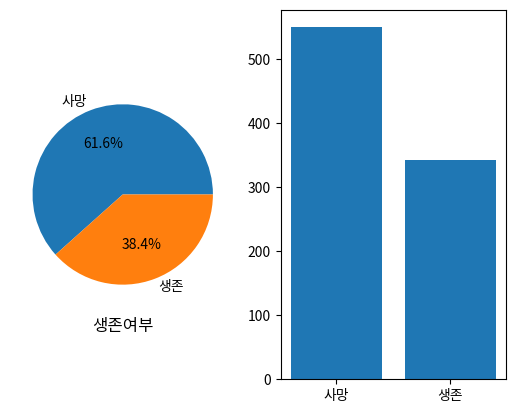

In [204]:
#Pclass
fig,axe=plt.subplots(nrows=1,ncols=2)
df_count=df_titanic["Survived"].value_counts()
df_count.sort_index(inplace=True);
axe[0].pie(df_count, labels=['사망','생존'],autopct ='%.1f%%')b
axe[1].bar(['사망','생존'],df_count);
axe[0].set_xlabel("생존여부",fontsize=12)

### 사망 : 61.6%
### 생존 : 38.4%

## 데이터 전처리

In [608]:
#분석에 필요없는 데이터 제거
df_titanic2=pd.read_csv("/home/piai/다운로드/bigdata/titanic.csv")
del df_titanic2['PassengerId']
del df_titanic2['Name']
df_titanic2.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked  
0   NaN        S  
1   C85        C  
2   NaN        S  
3  C123        S  
4   NaN        S

In [609]:
#파생변수 생성
#1. 객실 번호
df_titanic2['Cabin_class']=df_titanic2['Cabin'].str.get(0)
df_titanic2.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked Cabin_class  
0   NaN        S         NaN  
1   C85        C           C  
2   NaN        S         NaN  
3  C123        S           C  
4   NaN        S         NaN

In [610]:
df_df2=df_titanic2[(df_titanic2["Cabin_class"].isnull())]

In [611]:
df_df2.describe(include='all')

Survived      Pclass   Sex         Age       SibSp       Parch  \
count   687.000000  687.000000   687  687.000000  687.000000  687.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   470         NaN         NaN         NaN   
mean      0.299854    2.639010   NaN   28.117540    0.547307    0.365357   
std       0.458528    0.589602   NaN   11.864479    1.207492    0.827106   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   21.500000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   30.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   32.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   74.000000    8.000000    6.000000   

       Ticket        Fare Cabin Embarked Cabin_class  
count     687  687.000000     0      687           0  
unique    549         NaN     0        3           0  
top      1601         NaN   NaN        S         NaN  
freq        7         NaN   NaN      515         NaN  
mean      NaN   19.157325   NaN      NaN         NaN  
std       NaN   28.663343   NaN      NaN         NaN  
min       NaN    0.000000   NaN      NaN         NaN  
25%       NaN    7.877100   NaN      NaN         NaN  
50%       NaN   10.500000   NaN      NaN         NaN  
75%       NaN   23.000000   NaN      NaN         NaN  
max       NaN  512.329200   NaN      NaN         NaN

#### Cabin에 대한 결측치 687명 중 515명의 탑승 지역이 S(southampton)
#### 그러나 총 889의 값 중 644명의 탑승 지역이 S였으며 heatmap 그래프 분석으로도 결측치 687개의 값을 대체할 근거를 얻지 못함

In [612]:
df_test=df_titanic2[(df_titanic2["Embarked"].notnull())&(df_titanic2["Cabin_class"].notnull())]
df_test.head()
df_agg=df_test.groupby(["Cabin_class","Embarked"],as_index=False).agg("mean")
df_pivot=df_agg.pivot("Cabin_class","Embarked","Fare")
df_pivot

Embarked              C      Q           S
Cabin_class                               
A             38.357743    NaN   40.731763
B            145.964018    NaN   85.372283
C             98.582533  90.00  101.630442
D             74.470208    NaN   46.047915
E             92.905840  12.35   38.306731
F             22.358300   7.75   19.359091
G                   NaN    NaN   13.581250
T                   NaN    NaN   35.500000

In [613]:
sns.heatmap(df_pivot,cmap="viridis",annot=True)

<AxesSubplot:xlabel='Embarked', ylabel='Cabin_class'>

In [614]:
#2. 나이
def function2(x):
    if x<=14:
        return "Child"
    elif x<=28:
        return "Young"
    elif x<=45:
        return "Middle"
    elif x<=56:
        return "Prime"
    else:
        return "Old"

In [615]:
df_titanic2["Age_class"]=df_titanic2["Age"].apply(function2)
df_titanic2.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked Cabin_class Age_class  
0   NaN        S         NaN     Young  
1   C85        C           C    Middle  
2   NaN        S         NaN     Young  
3  C123        S           C    Middle  
4   NaN        S         NaN    Middle

In [616]:
#3. 가족수
df_titanic2['Family']=df_titanic2['Parch']+df_titanic2['SibSp']
df_titanic2.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked Cabin_class Age_class  Family  
0   NaN        S         NaN     Young       1  
1   C85        C           C    Middle       1  
2   NaN        S         NaN     Young       0  
3  C123        S           C    Middle       1  
4   NaN        S         NaN    Middle       0

In [617]:
#4. 요금 구간화
def function3(x):
    if x<=50:
        return 0
    elif x<=100:
        return 1
    elif x<=150:
        return 2
    elif x<=200:
        return 3
    else:
        return 4

In [618]:
df_titanic2["Fare"]=df_titanic2["Fare"].apply(function3)
df_titanic2.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket  Fare Cabin  \
0         0       3    male  22.0      1      0         A/5 21171     0   NaN   
1         1       1  female  38.0      1      0          PC 17599     1   C85   
2         1       3  female  26.0      0      0  STON/O2. 3101282     0   NaN   
3         1       1  female  35.0      1      0            113803     1  C123   
4         0       3    male  35.0      0      0            373450     0   NaN   

  Embarked Cabin_class Age_class  Family  
0        S         NaN     Young       1  
1        C           C    Middle       1  
2        S         NaN     Young       0  
3        S           C    Middle       1  
4        S         NaN    Middle       0

In [619]:
del df_titanic2['Parch']
del df_titanic2['SibSp']
del df_titanic2["Age"]
del df_titanic2["Cabin"]
del df_titanic2["Ticket"]
df_titanic2.head()

Survived  Pclass     Sex  Fare Embarked Cabin_class Age_class  Family
0         0       3    male     0        S         NaN     Young       1
1         1       1  female     1        C           C    Middle       1
2         1       3  female     0        S         NaN     Young       0
3         1       1  female     1        S           C    Middle       1
4         0       3    male     0        S         NaN    Middle       0

## Age class, Cabin class, Family 값에 대한 분포를 재확인(bar, pie)

Text(0.5, 23.52222222222222, '탑승 연령대')

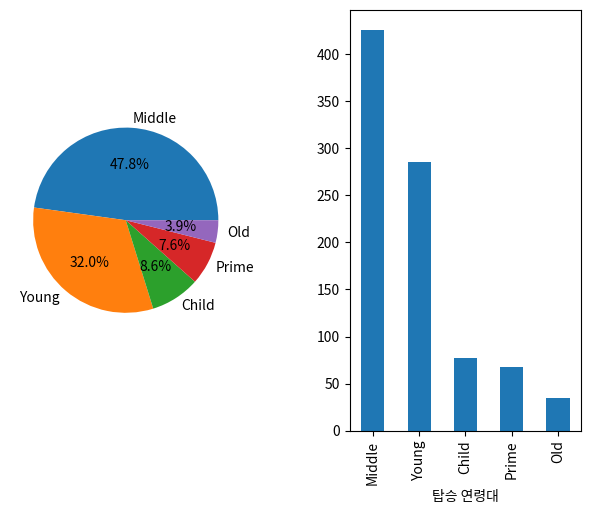

In [620]:
#Age class
fig5,axe5=plt.subplots(nrows=1,ncols=2)
plt.tight_layout(w_pad=5,h_pad=5)
df_count5=df_titanic2["Age_class"].value_counts()
a5=df_count5.index.tolist()
axe5[0].pie(df_count5, labels=a5, autopct ='%.1f%%')
df_count5.plot.bar()
plt.xlabel('탑승 연령대')

In [621]:
#Cabin class
fig6,axe6=plt.subplots(nrows=1,ncols=2)
plt.tight_layout(w_pad=5,h_pad=5)
df_count6=df_titanic2["Cabin_class"].value_counts()
a6=df_count6.index.tolist()
axe6[0].pie(df_count6, labels=a6, autopct ='%.1f%%')
df_count6.plot.bar()
plt.xlabel('객실 클래스')

Text(0.5, 23.52222222222222, '객실 클래스')

Text(0.5, 1.0, '티켓 요금 구간')

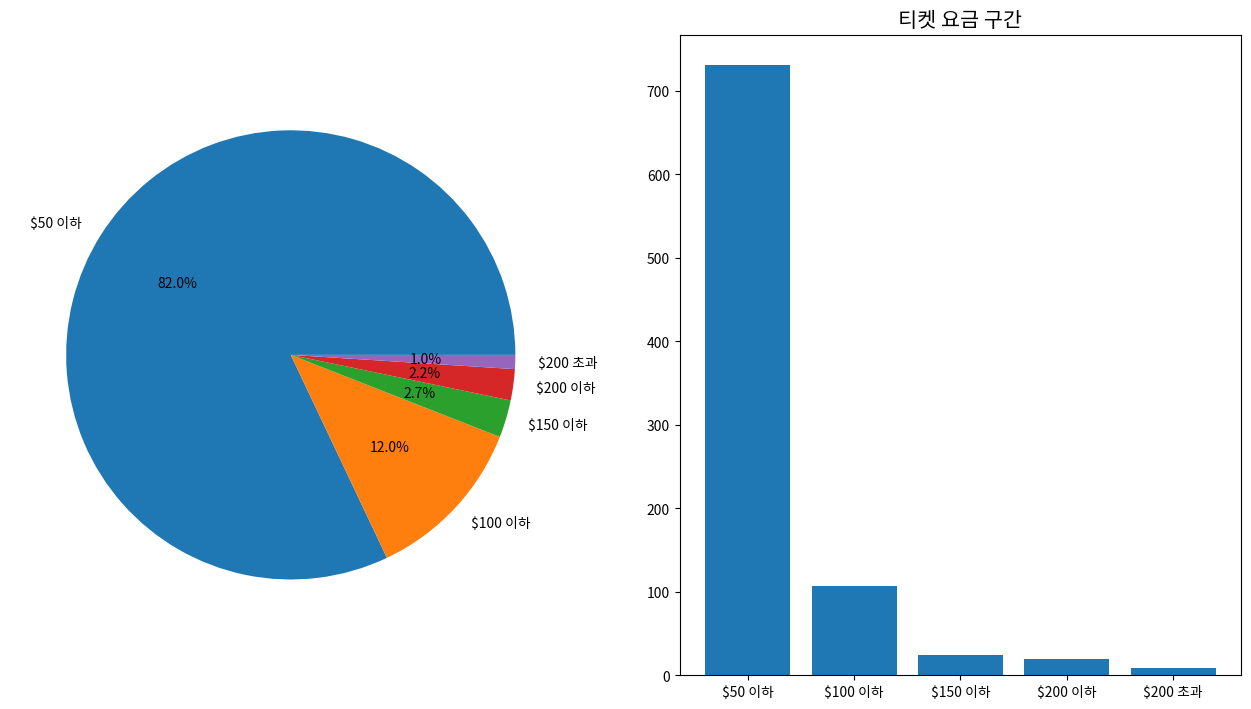

In [622]:
#Fare
fig7,axe7=plt.subplots(nrows=1,ncols=2,figsize=(13,7))
plt.tight_layout(w_pad=5,h_pad=5)
df_count7=df_titanic2["Fare"].value_counts()
a7=['$50 이하', '$100 이하', '$150 이하','$200 이하', '$200 초과']
axe7[0].pie(df_count7, labels=a7, autopct ='%.1f%%')
axe7[1].bar(a7,df_count7);
axe7[1].set_title("티켓 요금 구간",fontsize=15)

In [623]:
df_titanic2.isnull().sum()

Survived         0
Pclass           0
Sex              0
Fare             0
Embarked         2
Cabin_class    687
Age_class        0
Family           0
dtype: int64

In [624]:
df_titanic2["Embarked"].fillna("S",inplace=True)

### 범주형 변수 "Embarked" 결측치는 최빈값 S로 대체

In [625]:
del df_titanic2['Cabin_class']
df_titanic2.head()

Survived  Pclass     Sex  Fare Embarked Age_class  Family
0         0       3    male     0        S     Young       1
1         1       1  female     1        C    Middle       1
2         1       3  female     0        S     Young       0
3         1       1  female     1        S    Middle       1
4         0       3    male     0        S    Middle       0

### 결측치가 다수였던 Cabin 속성 제거

### 그래프 분석을 통해 변수간 관계를 확인

In [635]:
df_titanic2[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')

Survived
Pclass          
3       0.242363
2       0.472826
1       0.629630

#### 승객 등급은 생존에 영향을 미친다.

In [647]:
df_titanic2[['Sex','Survived']].groupby(['Sex']).mean().sort_values(by='Survived')

Survived
Sex             
male    0.188908
female  0.742038

#### 성별은 생존에 영향을 미친다.

In [640]:
df_titanic2[['Fare','Survived']].groupby(['Fare']).mean().sort_values(by='Survived')

Survived
Fare          
0     0.318741
1     0.654206
3     0.666667
4     0.700000
2     0.791667

#### 티켓 비용은 생존에 영향을 적게 미친다.

In [648]:
df_titanic2[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived')

Survived
Embarked          
S         0.339009
Q         0.389610
C         0.553571

#### 탑승 장소는 생존에 영향을 적게 미친다.

In [642]:
df_titanic2[['Age_class','Survived']].groupby(['Age_class']).mean().sort_values(by='Survived')

Survived
Age_class          
Old        0.285714
Young      0.361404
Middle     0.366197
Prime      0.411765
Child      0.584416

<AxesSubplot:xlabel='Age_class', ylabel='Count'>

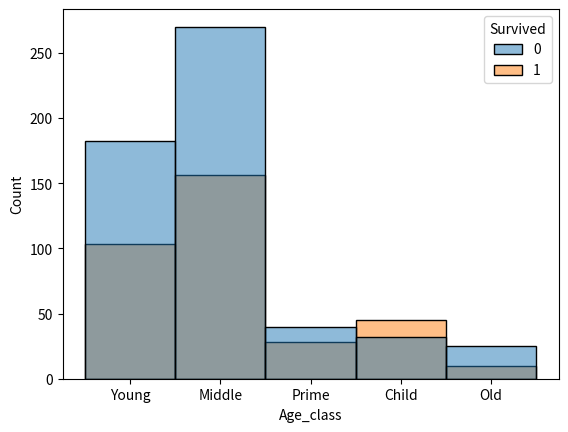

In [649]:
sns.histplot(data=df_titanic2,x='Age_class',hue='Survived')

#### 아이들(14세 이하)은 생존 확률이 높았다.

In [643]:
df_titanic2[['Family','Survived']].groupby(['Family']).mean().sort_values(by='Survived')

Survived
Family          
7       0.000000
10      0.000000
5       0.136364
4       0.200000
0       0.303538
6       0.333333
1       0.552795
2       0.578431
3       0.724138

#### 동승객(동승가족) 수는 생존에 영향을 적게 미친다.

In [645]:
df_agg=df_titanic2.groupby(["Pclass","Sex"],as_index=False).agg("mean")
df_pivot=df_agg.pivot("Pclass","Sex","Survived")
df_pivot

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

#### 1등석에 탑승한 여성일수록 생존 확률이 높고, 3등석에 탑승한 남성일수록 생존 확률이 낮았다.

In [646]:
df_agg1=df_titanic2.groupby(["Pclass","Age_class"],as_index=False).agg("mean")
df_pivot1=df_agg1.pivot("Pclass","Age_class","Survived")
df_pivot1

Age_class     Child    Middle       Old  Prime     Young
Pclass                                                  
1          0.800000  0.647059  0.363636  0.550  0.765957
2          1.000000  0.443038  0.142857  0.375  0.412698
3          0.415094  0.224490  0.166667  0.000  0.234286

#### 1등석에 탑승한 승객은 모든 연령대에서 생존 확률이 높았다.

In [656]:
df_agg1=df_titanic2.groupby(["Sex","Age_class"],as_index=False).agg("mean")
df_pivot1=df_agg1.pivot("Sex","Age_class","Survived")
df_pivot1

Age_class     Child    Middle       Old     Prime     Young
Sex                                                        
female     0.631579  0.743056  0.875000  0.863636  0.745098
male       0.538462  0.173759  0.111111  0.195652  0.147541

#### 아이들의 성별은 생존에 적게 영향을 미쳤다

#### 결론: 등급, 성별, 연령대가 생존에 영향을 크게 미치며, 생존과 등급-성별 사이에 유의미한 관계가 존재하였다. 1등석에 탑승한 여성일수록 생존 확률이 높고, 3등석에 탑승한 남성일수록 생존 확률이 낮았다. 1등석에 탑승한 승객은 모든 연령대에서 생존률이 높았으며 모든 연령대에서 여성이 생존률이 높았으나 아이들의 성별은 상대적으로 생존에 적게 영향을 미쳤음을 알 수 있다.   

# Python을 이용한 기술통계 실습

In [595]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

## 1. 시내-고속도로 연비 비교

In [596]:
ds_mycars=pd.read_csv("/home/piai/다운로드/bigdata/mycars.csv")
ds_mycars.head()

manufacturer model  displacement  year  cylinder automatic driving  mpg  \
0         audi    a4           1.8  1999         4      auto       f   18   
1         audi    a4           1.8  1999         4    manual       f   21   
2         audi    a4           2.0  2008         4    manual       f   20   
3         audi    a4           2.0  2008         4      auto       f   21   
4         audi    a4           2.8  1999         6      auto       f   16   

   highway_mileage fuel    class  
0               29    p  compact  
1               29    p  compact  
2               31    p  compact  
3               30    p  compact  
4               26    p  compact

In [597]:
ds_mycars.describe().round(3)
df=ds_mycars[['automatic','mpg']]
a=df.groupby('automatic').describe()
a

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [598]:
df2=ds_mycars[['automatic','highway_mileage']]
b=df2.groupby('automatic').describe()
b

highway_mileage                                                   
                    count       mean       std   min   25%   50%   75%   max
automatic                                                                   
auto                157.0  22.292994  5.623054  12.0  17.0  22.0  26.0  41.0
manual               77.0  25.779221  5.961772  12.0  23.0  26.0  29.0  44.0

#### 자동 157, 수동 77개
#### 고속도로에서의 연비  평균, 중앙값, 최소값, 최대값, Q1, Q3이 시내에서 연비 평균, 중앙값, 최소값, 최대값, Q1, Q3보다 높개


In [599]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, auto to manual
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (highway_mileage, count)  2 non-null      float64
 1   (highway_mileage, mean)   2 non-null      float64
 2   (highway_mileage, std)    2 non-null      float64
 3   (highway_mileage, min)    2 non-null      float64
 4   (highway_mileage, 25%)    2 non-null      float64
 5   (highway_mileage, 50%)    2 non-null      float64
 6   (highway_mileage, 75%)    2 non-null      float64
 7   (highway_mileage, max)    2 non-null      float64
dtypes: float64(8)
memory usage: 144.0+ bytes


## 2. 구동방식, 모델에 대해 계산

In [600]:
df3=ds_mycars[['automatic','model','mpg']]
count=df3[['automatic','model']].value_counts().sort_index()
cumcnt=np.cumsum(count)
percent=count/sum(count)*100
cumpct=np.cumsum(percent)

In [601]:
count_data=pd.DataFrame({'Count':count,'Cumcnt':cumcnt,'Percent':percent,'CumPct':cumpct})
count_data.columns.name='Cars'
count_data

Cars                           Count  Cumcnt   Percent      CumPct
automatic model                                                   
auto      4runner 4wd              4       4  1.709402    1.709402
          a4                       4       8  1.709402    3.418803
          a4 quattro               4      12  1.709402    5.128205
          a6 quattro               3      15  1.282051    6.410256
          altima                   3      18  1.282051    7.692308
...                              ...     ...       ...         ...
manual    pathfinder 4wd           1     219  0.427350   93.589744
          ram 1500 pickup 4wd      4     223  1.709402   95.299145
          sonata                   3     226  1.282051   96.581197
          tiburon                  4     230  1.709402   98.290598
          toyota tacoma 4wd        4     234  1.709402  100.000000

[63 rows x 4 columns]

# Python을 이용한 확률 계산 실습

## 3. 정규 분포

In [602]:
mu=175
sigma=5
x=180
prob=stats.norm.cdf(x,mu,sigma)
print("{0}cm은 {1:.1f}% 범위에 위치한다".format(x,(1-prob)*100))

180cm은 15.9% 범위에 위치한다


#### 1-(180cm 이하일 확률)

## 4. 확률 계산

In [603]:
mu=12
sigma=3
x1=15
x2=9

prob1=stats.norm.cdf(x1,mu,sigma)
prob2=stats.norm.cdf(x2,mu,sigma)
print("{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}에 해당함".format(x2,x1,(prob1-prob2)))

9km 이상 15km 이하를 달릴 확률은 0.683에 해당함


#### (15km 이하로 달릴 확률) - (9km 이하로 달릴 활률)

In [604]:
print("{0}km 이상 달릴 확률은 {1:.3f}에 해당함".format(x1,1-prob1))

15km 이상 달릴 확률은 0.159에 해당함


#### 1-(15km 이하로 달릴 확률)

## 5. t분포

In [605]:
t=2.0
df=100
prob=stats.t.cdf(t,df)
print("P(T<=F):{:.3f}".format(prob))

P(T<=F):0.976


#### 표본 101개 중 x값인 t값이 2.0일 때 누적 확률은 0.976

## 6. 카이제곱 분포

In [606]:
chisq=3.0
df=8
prob=stats.chi2.cdf(chisq,df)
print("P(X<={0}):{1:.4f}".format(chisq,prob))

P(X<=3.0):0.0656


#### 정규분포를 따르는 모집단에서 크기가 9인 표본을 무작위로 반복하여 추출하였을 때, 각 표본에 대해 구한 표본 분산들은 카이제곱 분포를 따름
#### 표본 9개를 무작위로 반복하여 뽑을 때, X값인 카이제곱 값이 3이면 누적확률은 0.0656  

## 7. F 분포

In [607]:
f=1.5
dfnum=10
dfden=100
prob=stats.f.cdf(x=f,dfn=dfnum,dfd=dfden)
print("P(X<=F):{:.3f}".format(prob))

P(X<=F):0.850


#### 분산이 같은 두 정규모집단으로부터 크기 11과 101인 확률표본을 반복하여 독립적으로 추출한 후, 구한 두 표본분산의 비율들의 표본분포
#### 이 때 X값인 F값이 1.5이면 누적확률은 0.850